In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from laspy.file import File
from sklearn import preprocessing
%matplotlib inline

# 1. Data loading into a dataframe

### 1.1 Put File location

In [ ]:
file_location = 'C:\\Users\\Kazi Abir Adnan\\The University of Melbourne\\Trent Penman - Sites\\las_format\\carpark.las'

### 1.2 Creating Dataframe

In [35]:
inFile = File(file_location, mode='r')
df = pd.DataFrame(columns = ["X", "Y", "Z", "Red", "Green", "Blue"])
df['X'] = inFile.X
df['Y'] = inFile.Y
df['Z'] = inFile.Z
df['Green'] = inFile.green/256
df['Red'] = inFile.red/256
df['Blue'] = inFile.blue/256
print("Length of dataset:", df.shape[0])

Length of dataset: 5764979


### 1.3 Normalizing data

In [37]:
x = df[['X']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['X'] = x_scaled

y = df[['Y']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
df['Y'] = y_scaled

z = df[['Z']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
df['Z'] = z_scaled

# 2. Plot functions

In [52]:
# 3d plotting
def plot_3d(df):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(df['X'].values, df['Y'].values, df['Z'].values, c = df[['Red','Green','Blue']].values/255.0, s= 0.05)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

#2d pllotting
def plot_2d(df):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(df['X'].values, df['Y'].values,c = df[['Red','Green','Blue']].values/255.0, s= 0.05)
    plt.show()

# 3. Explorations

### 3.1 Sample n data and plot in figure

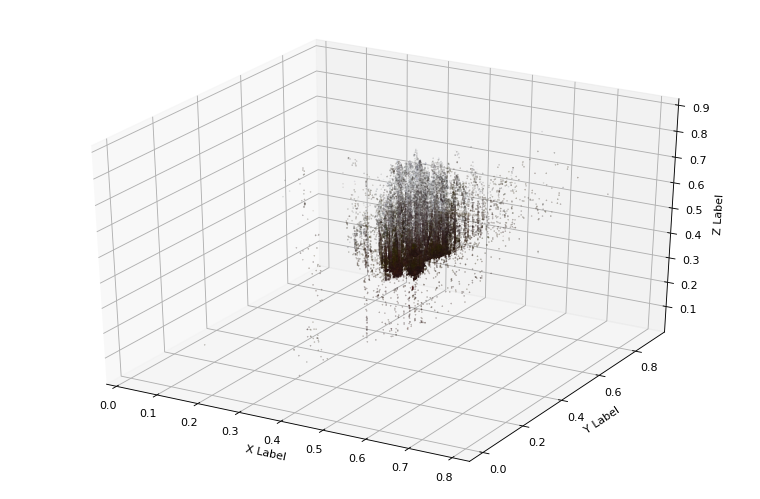

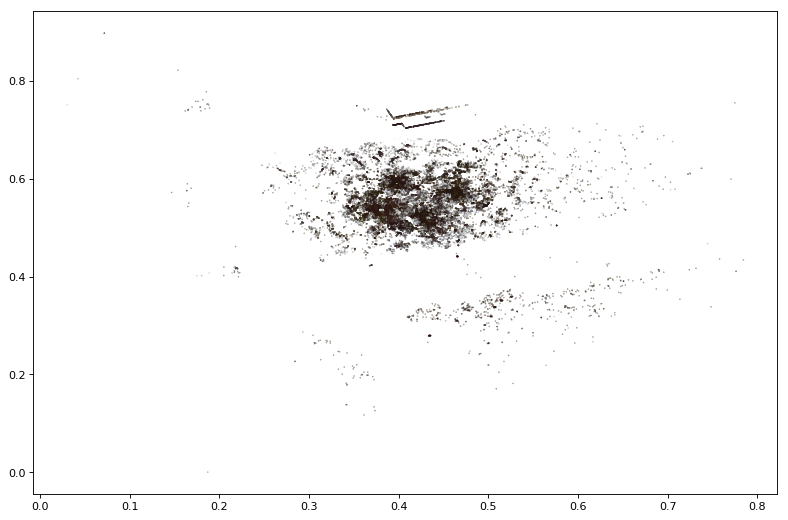

In [55]:
plot_3d(df.sample(n=200000, random_state = 42))
plot_2d(df.sample(n=200000, random_state = 42))